# Mortar finite element methods.
The following is meant to briefly describe the mortar method used in this work. The contacting *slave* and *master* surfaces are denoted by superscripts *1* and *2* respectively.
In the Mortar methods of [Yang, Laursen & Meng](https://onlinelibrary.wiley.com/doi/abs/10.1002/nme.1222) we have the contact virtual work
$\\ \delta \Pi_c = \int_{\gamma^c} \lambda (\delta x^{(1)} - \delta x^{(2)}) d\gamma$\
and the constraint
$\\ \delta \Pi_\lambda = \int_{\gamma^c} \delta \lambda (x^{(1)} - \delta x^{(2)}) d\gamma$  \
which are the weakly enforced contat constraints. These will be resolved on $\gamma^1$ by utilizing a continuous normal field wherein nodal normals are defined from\
$\\ \boldsymbol{n}_A = \frac{ l_1 \boldsymbol{n}_{A1} + l_2 \boldsymbol{n}_{A2} }{ || l_1 \boldsymbol{n}_{A1} + l_2 \boldsymbol{n}_{A2} ||}$  \
for node $A$ with adjacent sides $A1,A2$. The continuous normal field follows from   \
$\\ \boldsymbol{n}_e (\xi^{(1)}) = \sum_A N_A^{(1)}(\xi^{(1)}) \boldsymbol{n}_A.$\
Utilizing the continuous normal field we can form a *mortar segment* on which we can integrate the contact constraints by projecting slave nodes onto to the master surface and master nodes onto the slave surface. These projections are first described for linear elements wherein the *slave-to-master* projection is found at the intersection of the line emanating from the slave node normal $\boldsymbol{n}_s$ and the discrete master surface, i.e. $\xi^2$ is given from the solution of \
$ \left[ N_1(\xi^{(2)}) \boldsymbol{x}^{(2)}_1 + N_2(\xi^{(2)}) \boldsymbol{x}^{(2)}_2 - \boldsymbol{x}^{(1)}_s \right] \times \left[ \boldsymbol{n}_s \right] = \boldsymbol{0} $\
which is a linear equation with *one* solution. Similarly we find the *master-to-slave* projection by finding the point on the slave surface at which the line emanating from the continuous normal $\boldsymbol{n}_e(\xi^{(1)})$ intersects the master node to be projected $\boldsymbol{x}^{(2)}_m$. Thus, we solve the following quadratic equation for $\xi^{(1)}$\
$ \left[ N_1(\xi^{(1)}) \boldsymbol{x}^{(1)}_1 + N_2(\xi^{(1)}) \boldsymbol{x}^{(1)}_2 - \boldsymbol{x}^{(2)}_m \right] \times \left[ N_1(\xi^{(1)}) \boldsymbol{n}^{(1)}_1 + N_2(\xi^{(1)}) \boldsymbol{n}^{(1)}_2  \right] = 0 $\
which we can solve with for instance Newton's method. Should $\boldsymbol{n}^{(1)}_1$ and $\boldsymbol{n}^{(1)}_2$ coincide the projection is reduced to a linear equation. After the mortar projections have been found we can define the segment on which we then perform the integration. For the slave node at $\xi^{(1)}_a$ we find $\xi^{(2)}_a$ and for the closest located master node at $\xi^{(2)}_b$ we find $\xi^{(1)}_b$. Together these four coordinates form a *mortar segment* which we parameterize locally by $-1 \leq \eta \leq 1$. The map from the segment to each element is found as\
$\xi^{(i)} = \frac{1}{2}(1-\eta)\xi^{(i)_a} + \frac{1}{2}(1+\eta)\xi^{(i)}_b$\
with which we can reformulate the mortar quantities in the following fashion
$ \int_{-1}^1 N_A^{(1)} \left( \xi^{(1)}(\eta) \right) N_B^{(2)} \left( \xi^{(2)}(\eta) \right) || \frac{\partial \boldsymbol{x}^{(1)}}{\partial \xi^{(1)}} || \frac{ \partial \xi^{(1)}}{\partial \eta}  d\eta$\
and compute them by use of some quadrature scheme.

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [5789e2e9] + FileIO v1.16.1
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


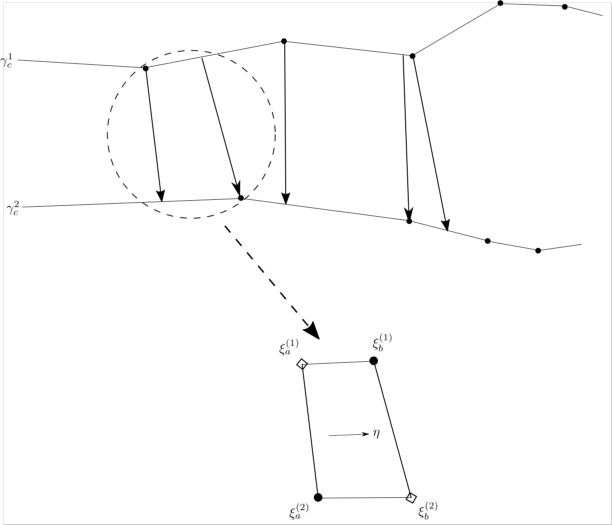

In [4]:
import Pkg;
Pkg.add("Images");
Pkg.add("FileIO");
using Images, FileIO
img_path = "images/mortar_projection.png"
img = load(img_path)

#### Lagrange multipliers $\lambda$
There exists many ways of treating the Lagrange multipliers. A common strategy is to introduce a dual base for their discretization, this does however come with the cost of managing an active set. Another way is to regularize them with either the penalty or Augmented Lagrangian Method.

In [1]:
import Pkg;
Pkg.add("Mortar2D");
Pkg.add("ForwardDiff");
Pkg.add("BenchmarkTools");
using Mortar2D, ForwardDiff, BenchmarkTools
function penalty(ε, g) 
    return -ε*max(0,g)
    #return -ε*min(0,g)
end
function d_penalty(ε,g)
    if g < 0
        return ε
    else
        return 0
    end
end
λ   = penalty(10.0, -0.5)
@time Δλ_ad  = ForwardDiff.derivative(x -> penalty(10.0,x), -0.5)

@time Δλ_an  = d_penalty(10.0,-0.5)
println("λ: $λ , Δλ_ad: $Δλ_ad, Δλ_an: $Δλ_an")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


  0.057172 seconds (153.88 k allocations: 10.420 MiB, 88.48% compilation time)
  0.000008 seconds (1 allocation: 64 bytes)
λ: -0.0 , Δλ_ad: -0.0, Δλ_an: 10.0


### Gap function
We define the gap function as $g = (\boldsymbol{x}^s  - \boldsymbol{x}^m) \cdot \boldsymbol{n}^s$ which in the discrete mortar formulation is represented by nodal weighted gap function $ g_A = \kappa_A \int_{\gamma^c} (\textbf{N}(\xi^s)^s \textbf{x}^s - \textbf{N}^m(\xi^m(\xi^s)) \textbf{x}^m ) N_A^s(\xi^s) \textbf{n}_A^s  d\gamma$. This is the mortar projected gap function which is scaled by $\kappa_A =  \frac{1}{\sum_D n^s_{AD}}$ to keep units consistent. We find $n^s_{AD}$ as\
$n^s_{AD} = \int_{\Gamma^s} N_A(\xi^s) N_D(\xi^s) d\Gamma$.\
Furthermore we introduce $n^s_{AB}$ and $n^m_{AC}$ as\
$n^s_{AB} = \int_{\gamma^s} N_A(\xi^s) N_B(\xi^s) d\Gamma$\
$n^m_{AC} = \int_{\gamma^s} N_A(\xi^s) N_C(\xi^m(\xi^s)) d\Gamma$\
to write\
$\textbf{g}_A = \kappa_A \left[ \sum_B n^s_{AB}\textbf{x}_B^s - \sum_C n^m_{AC}\textbf{x}_B^m \right]$\
from which the projected gap function follows as\
$g_A = \textbf{g}_A \cdot \textbf{n}_A$\
The "Mortar2D" Julia-package helps us compute $n_{AB}$ and $n_{AC}$ in matrix form by\
$\textbf{D}[j,k] = \int_{\gamma_c} N^s_j N_k^s d\gamma$\
$\textbf{M}[j,l] = \int_{\gamma_c} N^s_j (N_l^m \circ \chi) d\gamma$\
where $\chi$ is the mapping onto the mortar segment $\gamma_c$. 

In order to handle grid topologies in a multi-mesh setting we use Ferrite.jl which provides a dofhandler. Ferrite provides API for creating grids with GMSH or functions to import grids of common formats such as ABAQUS's "inp"-files. We demonstrate these functionalities along with a simple use case of the Mortar2D library to compte the gap function for two rectangular grids of linear triangular elements. For demonstration purposes we create two rectangular grids of 3-node triangle elements using GMSH in the function "createBoxMesh($x_0,y_0,\Delta x, \Delta y, gridsize $)". The two grids are then combined using "merge_grids" so that we can operate on only one set of degrees of freedom when assembling the discretised system and so on. Although it is not needed in this section we define quadrature rules and integration orders so that finite element operators and integration points are readily available if need be.


In [20]:
import Pkg;
Pkg.add("Gmsh");
Pkg.add("Ferrite");
Pkg.add("FerriteGmsh");
Pkg.add("FerriteMeshParser")
using Ferrite, FerriteGmsh, FerriteMeshParser

include("..//src/mesh_reader.jl")
include("..//src//Linear//initLin.jl") # initieras massa skit
include("..//src//Linear//Contact//contact_help.jl")
# Create two grids 
grid1    = createBoxMesh("box_1",0.0,0.0,1.0,1.0,0.33)
grid2    = createBoxMesh("box_2",0.25,0.99,0.5,0.5,0.25)

# Merge into one grid
grid_tot = merge_grids(grid1, grid2; tol=0.01)

# Create dofhandler with displacement field u
dh = DofHandler(grid_tot)
add!(dh, :u, 2)
close!(dh)

# Extract CALFEM-style matrices
coord, enod = getTopology(dh)

register = index_nod_to_grid(dh,coord)

# --------------------------------------------------------------------------- #
# These are useful if Shape functions/gradients defined by Ferrite are needed #
# --------------------------------------------------------------------------- #
ip      = Lagrange{2, RefTetrahedron, 1}();
qr      = QuadratureRule{2, RefTetrahedron}(1);
qr_face = QuadratureRule{1, RefTetrahedron}(1);
cv      = CellVectorValues(qr, ip);
fv      = FaceVectorValues(qr_face, ip);

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Although we have one grid object we still want to differentiate between master and slave sets. For simple geometries we can easily define face- and nodesets based on node coordinates using Ferrite as shown below

In [21]:
# ------------------ #
# Create master sets #
# ------------------ #
addfaceset!(dh.grid,"Γ_master", x -> x[2] ≈ 1.0)
Γm = getfaceset(dh.grid, "Γ_master")

addnodeset!(dh.grid,"nₘ", x -> x[2] ≈ 1.0)
nₘ = getnodeset(dh.grid,"nₘ")

# ----------------- #
# Create slave sets #
# ----------------- #
addfaceset!(dh.grid,"Γ_s", x -> x[2] ≈ 0.99)
Γs = getfaceset(dh.grid, "Γ_s")

addnodeset!(dh.grid,"nₛ", x -> x[2] ≈ 0.99)
nₛ = getnodeset(dh.grid,"nₛ")

Set{Int64} with 3 elements:
  32
  33
  31

In [22]:
# Go between coord and X 
# Mortar2D uses coord in "classic" CALFEM format and we can initially extract coord via Ferrite

include("..//src/mesh_reader.jl")

function getXfromCoord(coord) 
    X = Real[]
    for row ∈ 1:size(coord, 1) # eachindex(coord)
        append!(X, coord[row, 1])
        append!(X, coord[row, 2])
    end
    return X
end


coord, enod = getTopology(dh)
X = getXfromCoord(coord)

coord_temp = getCoordfromX(X)

norm(coord-coord_temp)

function getContactDofs(nₛ, nₘ)
    contact_dofs = Int64[]
    register     = getNodeDofs(dh)
    for node_nbr in nₛ
        for dof in 1:2
            append!(contact_dofs,register[node_nbr,dof])
        end
    end
    for node_nbr in nₘ
        for dof in 1:2
            append!(contact_dofs, register[node_nbr, dof])
        end
    end
    return contact_dofs
end

contact_dofs = getContactDofs(nₛ,nₘ)
#size(coord,1)

16-element Vector{Int64}:
 77
 78
 69
 70
 67
 68
 21
 22
 49
 50
 39
 40
 45
 46
 19
 20

We implemented the gap function as follows in the next code segment. 

In [23]:
function gap_function(X::AbstractVector{T}) where T
   # convert X to Real for compatibility with ForwardDiff 
   X_float = real.(X) 

   # Extract the coordinate vector (nbr_nodes x 2 )
   #coord  = getCoordVector(X_float)
   coordu = getCoordfromX(X_float)

   # Create dictionaries that are needed for the Mortar2D package
   elements,element_types, slave_elements, slave_element_ids, master_element_ids, coords = create_contact_list(dh,Γs,Γm, coordu)
   
   # Assemble D and M matrices and the slave and master dofs corresponding to the mortar segmentation
   slave_dofs, master_dofs, D, M                 = Mortar2D.calculate_mortar_assembly(elements, element_types, coords, slave_element_ids, master_element_ids)
   
   # Loop over slave dofs to compute the nodal gap vector. 
   g0      = zeros(eltype(X_float),length(slave_dofs),2)
   
   # Loops are fast with the LLVM compiler 
   for (j,A) in (enumerate(slave_dofs))
      slave  = [0;0]
      for B in slave_dofs
         slave  += D[A,B]*coords[B]  
      end
      master = [0;0]
      for C in master_dofs
         master += M[A,C]*coords[C]
      end
      # To compute the projected gap vector we multiply g[j,:] with the normal at node j
      g0[j,:] = slave - master
   end
   #return reshape(g0,8,1)
   return g0
 end

gap_function (generic function with 1 method)

### Automatic differentiation using ForwardDiff.jl
We can easily compute the derivative of the gap function using Automatic differentiation. This is provided in ForwardDiff.jl 

In [170]:
using ForwardDiff

# Retrieve the vector of coordinates X from the grid handled by the dofhandler dh.
#X         = getXordered(dh) 
X = getXfromCoord(coord)

# Compute the jacobian of gap_function(x) at X using automatic differentiation
@time J_ad = ForwardDiff.jacobian( x -> gap_function(x), X)

10×258 Matrix{Real}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Verifying the derivatives with finite differences
As can be seen by the output from the previous code-snippet 99% of the time spent in the call to ForwardDiff.jacobian is spent on compilation. This is due to the JIT-compilation in Julia and will be reduced significantly once run in real application.\

To verify the AD-derivatives we test them versus various FD-methods using the FiniteDifferences.jl package. Notably some derivatives (#2) only coincide if we use backwards differences, this is attributed to the non-smooth character of the mortar segmentation but could perhaps use some more looking into.

In [12]:
import Pkg;
Pkg.add("FiniteDifferences");
using FiniteDifferences
# Compute the first order derivative with second order accuracy using central differences "central_fdm(2,1)"
@time J_fd_central   = FiniteDifferences.jacobian(central_fdm(5,1),  gap_function, X)
@time J_fd_backwards = FiniteDifferences.jacobian(backward_fdm(5,1),  gap_function, X)
# Check  AD vs backwards finite differences
println("------------ using backwards FD ---------------")
wrong = 0
right = 0
for i ∈ eachindex(J_ad)
        error    = J_ad[i] - J_fd_backwards[1][i]
        quotient = J_ad[i]/J_fd_backwards[1][i]
        num1     = J_ad[i] 
        num2     = J_fd_backwards[1][i]
       if error != 0
          if (error > 1e-3 )
            println("Element $i quotient: $quotient with values AD $num1 FD $num2 ")
            wrong += 1function getContactDofs(nₛ,nₘ)

end
          end
       end
 end
 println("Number of correct   nonzero derivatives: $right ✅")
 println("Number of incorrect nonzero derivatives: $wrong 🚫")
 println("------------ using central FD -----------------")
 # Check AD vs central finite differences
 wrong = 0
 right = 0
 for i ∈ eachindex(J_ad)
         error    = J_ad[i] - J_fd_central[1][i]
         quotient = J_ad[i]/J_fd_central[1][i]
         num1     = J_ad[i] 
         num2     = J_fd_central[1][i]
        if error != 0
           if (error > 1e-3 )
             println("Element $i quotient: $quotient with values AD $num1 FD $num2 ")
             wrong += 1
           else
             right += 1
           end
        end
  end
 println("------------ using central FD -----------------")
 println("Number of correct   nonzero derivatives: $right ✅")
 println("Number of incorrect nonzero derivatives: $wrong 🚫")


   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [26cc04aa] + FiniteDifferences v0.12.26
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [26cc04aa] + FiniteDifferences v0.12.26
  [708f8203] + Richardson v1.4.0
Precompiling 

project...


  ✓ Richardson


  ✓ FiniteDifferences
  2 dependencies successfully precompiled in 1 seconds. 187 already precompiled.


  6.223924 seconds (56.29 M allocations: 1.976 GiB, 7.68% gc time, 62.46% compilation time)


  2.397885 seconds (50.98 M allocations: 1.634 GiB, 14.33% gc time)
------------ using backwards FD ---------------
Element 553 quotient: Inf with values AD 0.010000000000000009 FD 0.0 
Element 3178 quotient: -0.9999999999997934 with values AD 0.00500000000000006 FD -0.005000000000001093 
Number of correct   nonzero derivatives: 2845 ✅
Number of incorrect nonzero derivatives: 2 🚫
------------ using central FD -----------------
Element 553 quotient: 2.000043005399954 with values AD 0.010000000000000009 FD 0.0049998924888119 
Element 3178 quotient: -46494.52822204402 with values AD 0.00500000000000006 FD -1.0753953618201154e-7 
------------ using central FD -----------------
Number of correct   nonzero derivatives: 2845 ✅
Number of incorrect nonzero derivatives: 2 🚫


In an attempt to investigate *where* the finite differences fail we utilize the plotting utilities of Ferrite. 

In [13]:
g = gap_function(X)
for i ∈ 1:size(J_ad,1)
    for j ∈ 1:size(J_ad,2)
        error    = J_ad[i,j] - J_fd_central[1][i,j]
        if error != 0
            if (error > 1e-3 )
                num1        = J_ad[i,j]
                num2        = J_fd_central[1][i,j]
                coordinate  = X[j]
                coordinate2 = X[j-1]
                #local_gap   = g[i,:]
                println("There's a difference at indices $i $j of $num1 or $num2, this corresponds to $coordinate $coordinate2")
                #println("At which point the gap function is equal to $local_gap")
            end
        end
    end
end

There's a difference at indices 9 35 of 0.010000000000000009 or 0.0049998924888119, this corresponds to 0.0 0.8749999999996709
There's a difference at indices 10 199 of 0.00500000000000006 or -1.0753953618201154e-7, this corresponds to 1.0 0.99


#### Solving the nonlinear equillibrium problem
The contact residual and constraint are discretised following to mortar method into
$\\ \delta \Pi_{c,h} = \delta \textbf{u}_s^T \textbf{D}^T \boldsymbol{\lambda} - \delta \textbf{u}_m^T \textbf{M}^T \boldsymbol{\lambda}  = \delta \textbf{u}^T \left[ \begin{array}{c}
\textbf{0} \\ -\textbf{M}^T \\ \textbf{D}^T \end{array} \right] \boldsymbol{\lambda} = \delta \textbf{u}^T \textbf{B}^T_c \boldsymbol{\lambda} =
 \delta \textbf{u}^T \textbf{f}_c(\textbf{u},\boldsymbol{\lambda})$\
and the constraint
$\\ \delta \Pi_{\lambda,h} = \int_{\gamma^c} \delta \lambda (x^{(1)} - \delta x^{(2)}) d\gamma = \delta \boldsymbol{\lambda}^T \left[ \begin{array}{c}
\textbf{0} \\ -\textbf{M} \\ \textbf{D} \end{array} \right] \textbf{u} =
\delta \textbf{u}^T \textbf{B}_c \boldsymbol{\lambda} = 
\delta \boldsymbol{\lambda}^T \textbf{g}_c(\textbf{u},\boldsymbol{\lambda})$\
However, if we wish to relax the vector of lagrange multipliers $\boldsymbol{\lambda}$ by means of the penalty method or the augmented Lagrangian method we have to insert the following:\
$\boldsymbol{\lambda} = \varepsilon \cdot \text{max}( \textbf{0}, \textbf{g})$\
which implies $\delta_\lambda \boldsymbol{\lambda} = \textbf{0}$ and that\
$\delta \Pi_{\lambda,h} = \boldsymbol{\lambda} \delta \textbf{g} + \varepsilon H(\textbf{g}) \delta \textbf{g}^T \textbf{g} = \delta \textbf{u}^T \left( \textbf{f}_c(\textbf{u},\boldsymbol{\lambda}) + \varepsilon H(\textbf{g}) \textbf{f}_c(\textbf{u},\textbf{g}) \right) $\
where $H$ is the Heaviside step function. This is however an approximation since $\delta g \neq (\textbf{D} \delta \textbf{x}^s - \textbf{M}\delta \textbf{x}^m)\cdot \textbf{n}$ does not contain contributions $\frac{\partial d\gamma}{\partial u}$ from the weighted gap function. We first introduce the gap scaling $\kappa_A$ and then compute the full contact residual

In [24]:
# This is no efficient implementation and optimizations will be done later on once the code runs as desired
function gap_scaling(X::AbstractVector{T}) where T
    # convert X to Real for compatibility with ForwardDiff 
    X_float = real.(X)

    # Extract the coordinate vector (nbr_nodes x 2 )
    coord = getCoordfromX(X_float)
 
    # Create dictionaries that are needed for the Mortar2D package
    elements,element_types, slave_elements, slave_element_ids, master_element_ids, coords = create_contact_list(dh, Γs, Γm, coord)

    # Assemble D and M matrices and the slave and master dofs corresponding to the mortar segmentation
    slave_nods, master_nods, D, M                 = Mortar2D.calculate_mortar_assembly(elements, element_types, coords, slave_element_ids, master_element_ids)

   #  # Define scaling
    κ = zeros(eltype(X_float),length(slave_nods))

    for (i,a) in enumerate(slave_nods) 
       for (j,d) in enumerate(slave_nods)
          κ[i] += D[a,d]
       end
    end
    return κ
end
κ = gap_scaling(X)

3-element Vector{Float64}:
 0.12500000000017347
 0.12499999999982653
 0.25

In [25]:

function contact_residual(X::AbstractVector{T1},a::AbstractVector{T2},ε) where {T1,T2}

   # Order displacements according to nodes and not dofs
   a_ordered = getDisplacementsOrdered(dh,a)

   # Scaling
   κ = gap_scaling(X)

   # convert X to Real for compatibility with ForwardDiff 
   #X_float = real.(X)  + real.(a_ordered) # a ska vara sorterad på samma sätt som X, detta måste fixas!!!!!!!!! 
   X_float = real.(X + a_ordered) # a ska vara sorterad på samma sätt som X, detta måste fixas!!!!!!!!! 

   # Extract the coordinate vector (nbr_nodes x 2 )
   coordu = getCoordfromX(X_float)

   # Create dictionaries that are needed for the Mortar2D package
   elements,element_types, slave_elements, slave_element_ids, master_element_ids, coords = create_contact_list(dh, Γs, Γm, coordu)

   # Compute nodal normals
   normals = Mortar2D.calculate_normals(elements, element_types, coords)

   # Compute the projected gap function
   g     = gap_function(X_float)
   #println("gap function: ", g)


   # Assemble D and M matrices and the slave and master dofs corresponding to the mortar segmentation
   slave_nods, master_nods, D, M                 = Mortar2D.calculate_mortar_assembly(elements, element_types, coords, slave_element_ids, master_element_ids)

   # Initialize the nodal gap vector. 
   gₙ      = zeros(eltype(X_float), length(slave_nods))
   
   # Loop to compute weigted gap at each node
   for i ∈ eachindex(gₙ)
      gₙ[i] = g[i,:] ⋅ normals[slave_nods[i]]
   end

   # Initialize r_c
   r_c = zeros(eltype(X_float), size(X)) # sparse...?

   # ---------- #
   # ∫ᵧ 𝛅g λ dγ  #
   # ---------- #
   
   # Loop over master side dofs
   for C in master_nods
      for (i,A) in enumerate(slave_nods)
         C_dofs       = register[C,:] # Extract nodal degrees of freedom
         r_c[C_dofs] += -M[A,C] * penalty(gₙ[i],ε) * normals[A] * (1/κ[i]) #  ∫ N^s N^s λ n dγ
      end
   end

   # Loop over slave side dofs
   for B in slave_nods
      for (i,A) in enumerate(slave_nods)
         B_dofs       = register[B,:]  # Extract nodal degrees of freedom
         r_c[B_dofs] += D[A,B] * penalty(gₙ[i],ε) * normals[A] * (1/κ[i]) #  ∫ N^s N^m λ n dγ
      end
   end

   # ---------------------------------- #
   # ∫ᵧ g 𝛅λ dγ = 0 for penalty methods  #  
   # ---------------------------------- #

   return r_c
end

# Retrieve // Create displacement field on the format of X-ordered
a = ones(size(X))*1e-4

# Compute the residual
r = contact_residual(X,a,10.0)

# Nonzero elements
r[findall(x -> x != 0 , r)]
include("..//src/mesh_reader.jl")

size(r)
dh.ndofs.x

84

Of course we should test AD for this residual too, which is done in the following section. It is evident that the AD agrees quite well with FD except for a few dofs which is attributed to mortar segments switching nodes.

In [141]:
nonzero_elements = findall(x -> x != 0, r)
K_c_ad = ForwardDiff.jacobian( u -> contact_residual(X,u,1.0), a)
K_c_fd = FiniteDifferences.jacobian(backward_fdm(5,1), u -> contact_residual(X,u,1.0), a)
wrong  = 0
right  = 0


# Lets have a closer look
for i in 1 : size(K_c_ad,1)
   for j in 1 : size(K_c_ad,2)
      error    = norm(K_c_ad[i,j] - K_c_fd[1][i,j])
      quotient = K_c_ad[i,j]/K_c_fd[1][i,j]
      num1     = K_c_ad[i,j] 
      num2     = K_c_fd[1][i,j]
      if error > 1e-10
         if (error > 1e-3 )
            coordinate = coord[i,:]
            println("index ($i , $j) quotient: $quotient with values AD $num1 FD $num2 w.r.t $coordinate")
            wrong += 1
         else
            right += 1
            #println(num1," ", num2)
         end
      end
   end
end   
println("------------ using backwards FD -----------------")
println("Number of correct   nonzero derivatives: $right ✅")
println("Number of incorrect nonzero derivatives: $wrong 🚫")
println(size(K_c_ad))

BoundsError: BoundsError: attempt to access 103×24 SparseMatrixCSC{Real, Int64} with 16 stored entries at index [99, 25]

In [18]:
   # Extract the coordinate vector (nbr_nodes x 2 )
   X       = getX(dh)
   coord   = getCoord(X,dh)

   # Create dictionaries that are needed for the Mortar2D package
   elements,element_types, slave_elements, slave_element_ids, master_element_ids, coords = create_contact_list(dh, Γs, Γm, coord)

   # Compute nodal normals
   normals = Mortar2D.calculate_normals(elements, element_types,coords) 

   # Visualization
   nodeDofs = getNodeDofs(dh)
   a .= 0.0
   for node ∈ nₛ
      a[nodeDofs[node,2]] = normals[node][2]
   end
   for node ∈ nₘ
      a[nodeDofs[node,2]] = normals[node][2]
   end
   postprocess_opt(a, dh, "contact_mesh")
   
   # normals är normaler för båda ytor
   @show normals
   

normals = Dict{Int64, Vector{Real}}(20 => [0.0, -1.0], 105 => [0.0, 1.0], 24 => [0.0, -1.0], 23 => [0.0, -1.0], 19 => [0.0, -1.0], 22 => [0.0, -1.0], 99 => [0.0, 1.0], 106 => [0.0, 1.0], 25 => [0.0, -1.0], 103 => [0.0, 1.0], 102 => [0.0, 1.0], 21 => [0.0, -1.0], 10 => [0.0, -1.0], 18 => [0.0, -1.0], 104 => [0.0, 1.0], 100 => [0.0, 1.0], 101 => [0.0, 1.0])


Dict{Int64, Vector{Real}} with 17 entries:
  20  => [0.0, -1.0]
  105 => [0.0, 1.0]
  24  => [0.0, -1.0]
  23  => [0.0, -1.0]
  19  => [0.0, -1.0]
  22  => [0.0, -1.0]
  99  => [0.0, 1.0]
  106 => [0.0, 1.0]
  25  => [0.0, -1.0]
  103 => [0.0, 1.0]
  102 => [0.0, 1.0]
  21  => [0.0, -1.0]
  10  => [0.0, -1.0]
  18  => [0.0, -1.0]
  104 => [0.0, 1.0]
  100 => [0.0, 1.0]
  101 => [0.0, 1.0]

### **Solving the state problem**
Using the above defined contact we now resort to displacing the top mesh into the bottom one

In [26]:
import Pkg;
Pkg.add("LinearSolve");
Pkg.add("SparseArrays");
Pkg.add("IterativeSolvers");
Pkg.add("IncompleteLU");
Pkg.add("StaticArrays")
Pkg.add("Tensors")
using LinearSolve, SparseArrays # LinearSolvePardiso
using IterativeSolvers, IncompleteLU    # AlgebraicMultigrid
include("..//src/mesh_reader.jl")

include("..//src//material.jl")
include("..//src//fem.jl")

# Define top nodeset for displacement controlled loading
addnodeset!(dh.grid, "Γ_top", x -> x[2] ≈ 1.49)
Γ_top = getnodeset(dh.grid, "Γ_top")

# Define bottom nodeset subject to  u(X) = 0 ∀ X ∈ Γ_bot
addnodeset!(dh.grid, "Γ_bot", x -> x[2] ≈ 0.0)
Γ_bot = getnodeset(dh.grid, "Γ_bot")



   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Set{Int64} with 5 elements:
  5
  4
  2
  3
  1

In [27]:

include("..//src//Linear//assemLin.jl")
include("..//src//Linear//assemElemLin.jl")
include("..//src//mesh_reader.jl")

register = getNodeDofs(dh)
X        = getX(dh)
coord    = getCoordfromX(X)

# Solve the nonlinear equillibrium problem .. 
function solver(dh, coord)

    # ---------- #
    # Set params # // Kanske som input till solver???
    # ---------- # // definiera mp här? och kanske ε ? iofs snyggare utanför!  
    t = 1.0

    # Penalty parameter
    ε = 3.5

    # Define material parameters
    mp = [210 0.3] # [E ν]

    # ------------- #
    # Init-stuff    #
    # ------------- #
    imax = 25
    TOL = 1e-8
    residual = 0.0
    iter = 1
    # ------------- #.0
    # ------------- #
    K = create_sparsity_pattern(dh)
    
    # ------ #
    #  Init  #
    # ------ #
    global Fᵢₙₜ = zeros(dh.ndofs.x)
    global Fₑₓₜ = zeros(dh.ndofs.x)
    global a    = zeros(dh.ndofs.x)
    global Δa   = zeros(dh.ndofs.x)
    global res  = zeros(dh.ndofs.x)

    # ---------- #
    # Set BCS    # 
    # ---------- # 
    # Set bcs - should be moved outside this function
    bcdof_top, bcval_top = setBCXY(-0.01, dh, Γ_top)
    bcdof_bot, bcval_bot = setBCXY( 0.0 , dh, Γ_bot)
    bcdof                = [bcdof_top; bcdof_bot]
    bcval                = [bcval_top; bcval_bot]

    ϵᵢⱼₖ  = sortperm(bcdof)
    bcdof = bcdof[ϵᵢⱼₖ]
    bcval = bcval[ϵᵢⱼₖ]

    # - For Linear solver..
    pdofs = bcdof
    fdofs = setdiff(1:dh.ndofs.x, pdofs)

    bcval₀ = bcval

    for loadstep ∈ 1 : 10
        res      = res .* 0
        bcval    = bcval₀
        residual = 0 * residual
        iter     = 0
        fill!(Δa, 0.0)
        println("Starting equillibrium iteration at loadstep: ", loadstep)

        # # # # # # # # # #
        # Newton solve.   #
        # # # # # # # # # #
        while (iter < imax && residual > TOL) || iter < 2
            iter      += 1
            a         += Δa
            assemGlobal!(K, Fᵢₙₜ, dh, mp, t, a, coord, enod, ε)            
            
            solveq!(Δa, K, -Fᵢₙₜ, bcdof, bcval)
            bcval      = 0 * bcval
            res        = Fᵢₙₜ - Fₑₓₜ
            res[bcdof] = 0 * res[bcdof]
            residual   = norm(res, 2)
            println("Iteration: ", iter, " Residual: ", residual)
            
            postprocess_opt(a, dh, "contact_mesh" * string(loadstep))
            #postprocess_opt(Fᵢₙₜ, dh, "contact_mesh" * string(loadstep))
        end
    end
    fill!(Fₑₓₜ, 0.0)
    Fₑₓₜ[bcdof] = -Fᵢₙₜ[bcdof]
    return a, dh, Fₑₓₜ, Fᵢₙₜ, K
end



# Solve
a, dh, Fₑₓₜ, Fᵢₙₜ, K = solver(dh, coord);

# Visualize using e.g. paraview (import image) or FerriteViz
# postprocess_opt(Fᵢₙₜ, dh, "contact_mesh");

# function to extract stressfield..

Starting equillibrium iteration at loadstep: 1
contact residual: 

0.015155444566224112
Iteration: 1 Residual: 0.015155444566224112
contact residual: 

0.025473537719276077
Iteration: 2 Residual: 0.10976262182724222
contact residual: 0.03156851157512986
Iteration: 3 Residual: 1.8848745424943971
contact residual: 0.03582810810107091
Iteration: 4 Residual: 0.11001966911222417
contact residual: 0.03863994575144661
Iteration: 5 Residual: 2.3837545185950684
contact residual: 0.04047728051808944
Iteration: 6 Residual: 2.1024621201933487
contact residual: 

0.04167086042811022
Iteration: 7 Residual: 0.7775605342018591
contact residual: 0.042445039299072555
Iteration: 8 Residual: 648.6393653184674
contact residual: 0.04294722503287957
Iteration: 9 Residual: 170.46965607065684
contact residual: 0.04327313125801314
Iteration: 10 Residual: 46.57090940441859
contact residual: 0.04348473790953414
Iteration: 11 Residual: 6.17205106022243


DomainError: DomainError with -3.713442479543423:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.